#### RED WINE

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### Load Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

##### Analyze data

In [3]:
print("Dataset shape:", df.shape)
print(df.info())
print(df.describe())

Dataset shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000    

INSIGHTS: The dataset has 1,599 red wine samples with 11 numeric features and no missing values.
Wine quality ranges from 3 to 8, with most wines rated 5 or 6 (average quality).
Alcohol, volatile acidity, and sulphates are key factors influencing wine quality.

summary statistics

In [12]:
print(df.describe().T)

                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed ac

INSIGHTS: Most wines have moderate acidity and alcohol levels, with alcohol ranging from 8.4% to 14.9%.
Sulphates and volatile acidity show noticeable variation, possibly affecting taste and quality.
Wine quality is centered around 5–6, with few high-quality (8) wines in the dataset.

Correlation Heatmap

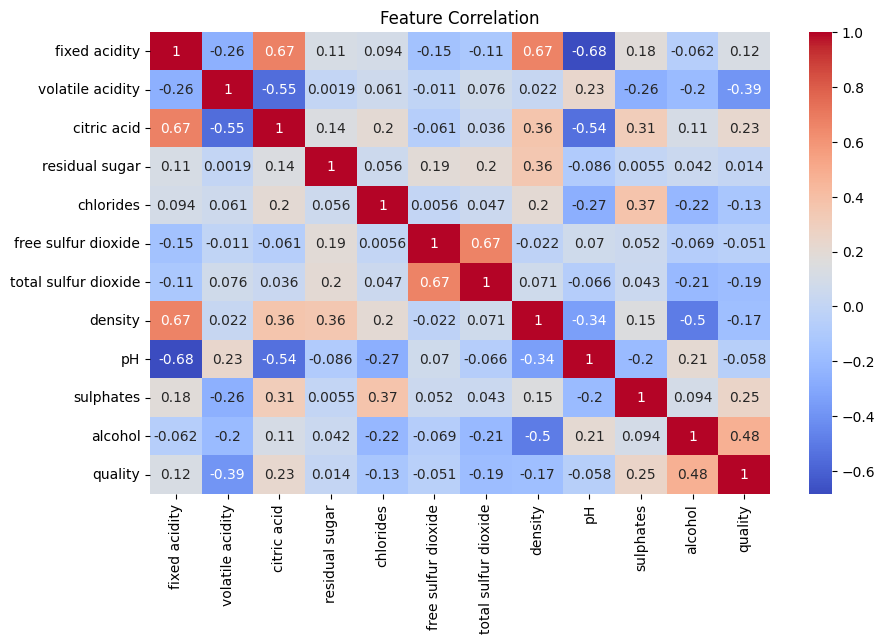

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Feature Matrix and Target

In [5]:
X = df.drop("quality", axis=1)
y = df["quality"]

Split and Scale

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Train SVM Model

Try Different Kernels and C Values

In [10]:
kernels = ["linear", "poly", "rbf"]
C_values = [0.1, 1, 10]

In [13]:
kernels = ["linear", "poly", "rbf"]
C_values = [0.1, 1, 10]

results = []

for kernel in kernels:
    for C in C_values:
        svr = SVR(kernel=kernel, C=C)
        svr.fit(X_train_scaled, y_train)
        y_pred = svr.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Kernel": kernel,
            "C": C,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2_Score": r2
        })

In [17]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="R2_Score", ascending=False)

results_df_sorted

,Kernel,C,MAE,MSE,RMSE,R2_Score
7,rbf,1.0,0.453528,0.351374,0.592768,0.462324
8,rbf,10.0,0.455236,0.364105,0.603411,0.442843
6,rbf,0.1,0.488989,0.390001,0.624500,0.403218
0,linear,0.1,0.500793,0.396603,0.629764,0.393115
1,linear,1.0,0.500660,0.396634,0.629789,0.393067
2,linear,10.0,0.500673,0.396661,0.629811,0.393026
3,poly,0.1,0.548710,0.480820,0.693412,0.264245
4,poly,1.0,0.540810,0.539107,0.734239,0.175055
5,poly,10.0,0.552585,0.587303,0.766357,0.101304


The RBF kernel with C=1.0 performs best overall, achieving the lowest MSE and highest R² score (≈0.46).
Linear kernel shows stable but lower performance across all C values, with minimal impact from increasing C.
Polynomial kernel underperforms, especially at higher C values, indicating it's not well-suited for this dataset.

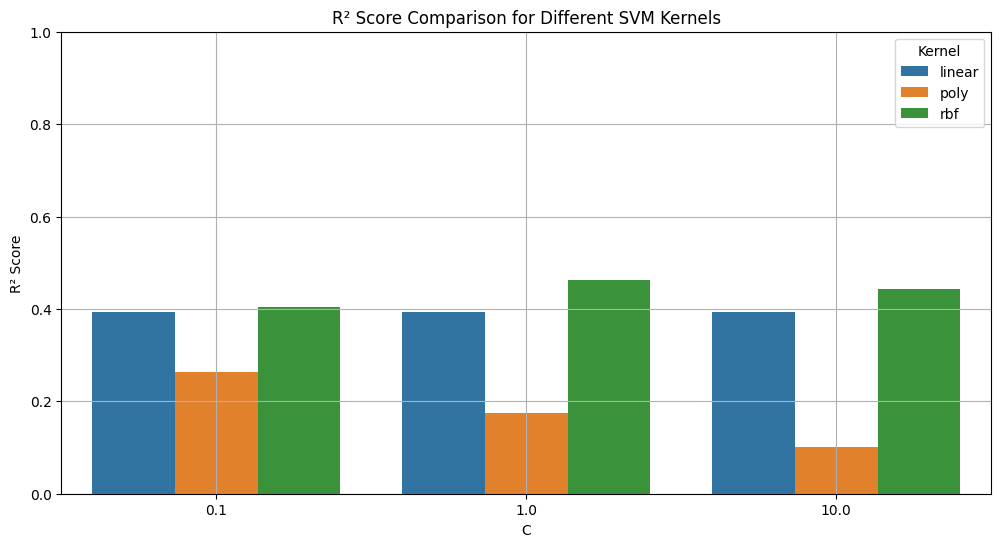

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x="C", y="R2_Score", hue="Kernel", data=results_df)
plt.title("R² Score Comparison for Different SVM Kernels")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Best Model

In [20]:
best_model = max(results, key=lambda x: x["R2_Score"])
print("\n Best Model:")
print(f"Kernel: {best_model['Kernel']}, C: {best_model['C']}, R² Score: {best_model['R2_Score']:.4f}")



 Best Model:
Kernel: rbf, C: 1, R² Score: 0.4623


##### FINAL INSIGHTS

🔹 RBF Kernel (Best Performance at C=1.0)
RBF is good at capturing non-linear relationships. At C=1.0, it balances bias and variance well — allowing slight errors while still fitting the data closely, which results in better generalization.

🔹 Linear Kernel (Stable but Lower Performance)
Linear kernels assume a straight-line relationship. Since wine quality likely depends on complex interactions between features, linear assumptions miss those nuances. That’s why even increasing C doesn’t improve performance much — the model is fundamentally too simple.

🔹 Polynomial Kernel (Worst Performance)
Poly kernels can overfit easily, especially with higher degrees or larger C values. In this case, it's likely too sensitive to noise and overcomplicates the model, which leads to poor generalization and higher error metrics.

#### WHITE WINE

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### Load Dataset

In [22]:
df = pd.read_csv('winequality-white.csv')

##### Analyze data

In [23]:
print("Dataset shape:", df.shape)
print(df.info())
print(df.describe())

Dataset shape: (4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000    

INSIGHTS:Most features like residual sugar and total sulfur dioxide show high variability, indicating potential influence on wine quality.

The average alcohol content is around 10.5%, and quality tends to cluster around 5–6.

No missing values are present; the data is clean and ready for modeling.

summary statistics

In [24]:
print(df.describe().T)

                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

           

INSIGHTS: Features like residual sugar and total sulfur dioxide have high maximum values and wide ranges, indicating potential outliers.

Most wines have quality scores around 5–6, with alcohol averaging ~10.5%.

Dataset is clean with consistent entries, ready for feature scaling and modeling.

Correlation Heatmap

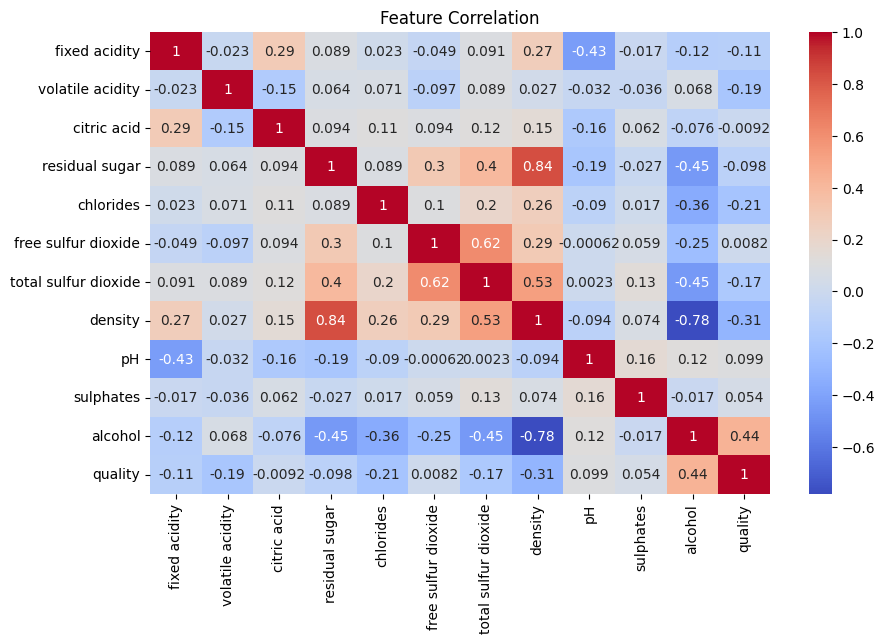

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Feature Matrix and Target

In [26]:
X = df.drop("quality", axis=1)
y = df["quality"]

Split and Scale

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Train SVM Model

Try Different Kernels and C Values

In [28]:
kernels = ["linear", "poly", "rbf"]
C_values = [0.1, 1, 10]

In [29]:
kernels = ["linear", "poly", "rbf"]
C_values = [0.1, 1, 10]

results = []

for kernel in kernels:
    for C in C_values:
        svr = SVR(kernel=kernel, C=C)
        svr.fit(X_train_scaled, y_train)
        y_pred = svr.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Kernel": kernel,
            "C": C,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2_Score": r2
        })

In [30]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="R2_Score", ascending=False)

results_df_sorted

,Kernel,C,MAE,MSE,RMSE,R2_Score
7,rbf,1.0,0.516481,0.470917,0.686234,0.391952
8,rbf,10.0,0.509440,0.471269,0.686490,0.391497
6,rbf,0.1,0.548393,0.512531,0.715912,0.338220
2,linear,10.0,0.583594,0.573310,0.757172,0.259742
1,linear,1.0,0.583646,0.573376,0.757216,0.259657
0,linear,0.1,0.584218,0.574302,0.757827,0.258461
3,poly,0.1,0.586486,0.591882,0.769339,0.235762
4,poly,1.0,0.590128,0.627474,0.792132,0.189806
5,poly,10.0,0.606902,0.773887,0.879709,0.000756


RBF kernel with C=1.0 performs best overall, with the lowest MSE and highest R² score (≈0.39), indicating good generalization.

Linear kernel shows consistent but lower performance across all C values, with minimal gains from increasing C.

Polynomial kernel underperforms significantly, especially at higher C values, suggesting it's not a good fit for this dataset.

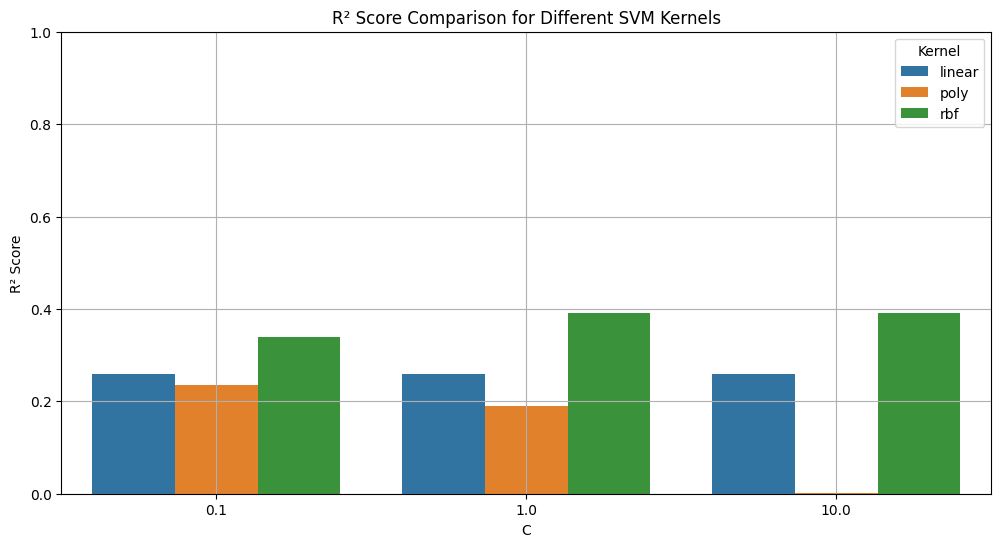

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x="C", y="R2_Score", hue="Kernel", data=results_df)
plt.title("R² Score Comparison for Different SVM Kernels")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Best Model

In [32]:
best_model = max(results, key=lambda x: x["R2_Score"])
print("\n Best Model:")
print(f"Kernel: {best_model['Kernel']}, C: {best_model['C']}, R² Score: {best_model['R2_Score']:.4f}")



 Best Model:
Kernel: rbf, C: 1, R² Score: 0.3920


##### FINAL INSIGHTS

🔹 RBF Kernel (Best Performance at C=1.0)
RBF is good at capturing non-linear relationships. At C=1.0, it balances bias and variance well — allowing slight errors while still fitting the data closely, which results in better generalization.

🔹 Linear Kernel (Stable but Lower Performance)
Linear kernels assume a straight-line relationship. Since wine quality likely depends on complex interactions between features, linear assumptions miss those nuances. That’s why even increasing C doesn’t improve performance much — the model is fundamentally too simple.

🔹 Polynomial Kernel (Worst Performance)
Poly kernels can overfit easily, especially with higher degrees or larger C values. In this case, it's likely too sensitive to noise and overcomplicates the model, which leads to poor generalization and higher error metrics.